In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import json
import random
%matplotlib inline

In [39]:
with open('./input.json') as file:
    data = json.load(file)

In [40]:
SIZE_OF_ONE_IMAGE = 35

In [41]:
def generate_dataframe(data):
    x, y = [], []
    for _ in range(10000):
        random_number = random.randint(0,9)

        x.append(random.choice(data[str(random_number)]))
        y.append(list(map(int, list('0' * random_number + '1' + (9 - random_number) * '0'))))
    return x, y

In [42]:
X, Y = generate_dataframe(data)

In [43]:
def plot_image(pixels):
    plt.imshow(pixels.reshape((7, 5)))
    plt.show()

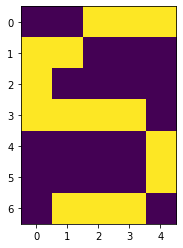

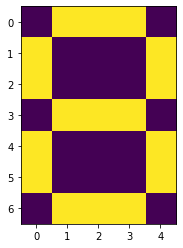

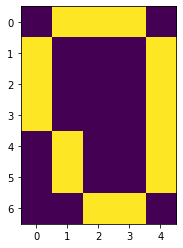

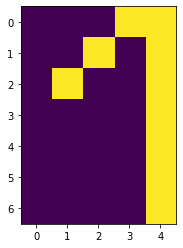

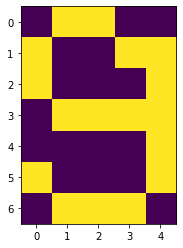

In [44]:
for i in range(5):
    random_number = random.randint(0,len(X)-1)
    plot_image(np.array(X[random_number]))

In [45]:
def split_train_test(x, y, koef):
    length = len(x)
    X_train, Y_train = [], []
    for _ in range(int(length * koef)):
        random_number = random.randint(0,len(x) - 1)
        
        X_train.append(x.pop(random_number))
        Y_train.append(y.pop(random_number))
    return X_train, Y_train, x, y
        

In [46]:
X_train, Y_train, X_temp, Y_temp = split_train_test(X, Y, 0.7)
X_validation, Y_validation, X_test, Y_test = split_train_test(X_temp, Y_temp, 0.2)

In [47]:
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(SIZE_OF_ONE_IMAGE,), units=128, activation='relu'))
model.add(keras.layers.Dense(30))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               4608      
                                                                 
 dense_17 (Dense)            (None, 30)                3870      
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
Total params: 9,308
Trainable params: 9,308
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(X_train, Y_train, epochs=5, batch_size=128, validation_data=(X_validation, Y_validation))

Epoch 1/5
17/55 [========>.....................] - ETA: 0s - loss: 2.3014 - accuracy: 0.0230    

2022-03-31 10:45:35.406917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 3s 53ms/step - loss: 2.0925 - accuracy: 0.2234 - val_loss: 1.7896 - val_accuracy: 0.5133
Epoch 2/5
18/55 [========>.....................] - ETA: 0s - loss: 1.7417 - accuracy: 0.6029

2022-03-31 10:45:38.246228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 0s 7ms/step - loss: 1.5865 - accuracy: 0.6709 - val_loss: 1.3468 - val_accuracy: 0.7267
Epoch 3/5
55/55 [==============================] - 0s 7ms/step - loss: 1.1894 - accuracy: 0.7851 - val_loss: 0.9999 - val_accuracy: 0.9100
Epoch 4/5
55/55 [==============================] - 0s 7ms/step - loss: 0.8774 - accuracy: 0.9421 - val_loss: 0.7317 - val_accuracy: 0.9750
Epoch 5/5
55/55 [==============================] - 0s 7ms/step - loss: 0.6395 - accuracy: 0.9780 - val_loss: 0.5304 - val_accuracy: 0.9750


In [51]:
model.evaluate(X_test, Y_test)

33/75 [============>.................] - ETA: 0s - loss: 0.5347 - accuracy: 0.9697

2022-03-31 10:45:49.477110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.9721


[0.5428380370140076, 0.972083330154419]

In [52]:
predicted_results = model.predict(np.array([0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1]).reshape(1,-1), batch_size=128)
predicted_results.argmax()

2022-03-31 10:45:49.925662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2